La température moyenne est de :  10.3925
La somme des précipitations par mois est de :  Date
1      75
2     190
3     200
4     180
5     170
6     150
7     170
8      80
9     135
10    195
11    115
12    180
Name: Precipitation, dtype: int64


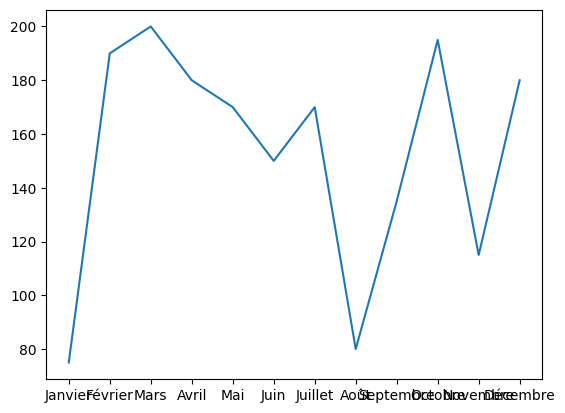

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("weather_data_1000.csv")

data = data[["Temperature", "Humidity", "Precipitation", "Date"]]

# transformation de la date en mois

label_month = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]

data["Date"] = pd.to_datetime(data["Date"]).dt.month

mean_temp = data["Temperature"].mean()

print("La température moyenne est de : ", mean_temp)

total_precipitation = data["Precipitation"].groupby(data["Date"]).sum()

print("La somme des précipitations par mois est de : ", total_precipitation)

plt.plot(label_month, total_precipitation)

# les mois avec le plus de précipitations sont : Fevrier, Octobre et Mars

L'humidité moyenne par mois est de :  Date
1     54.651807
2     65.159524
3     68.779612
4     69.140000
5     64.900000
6     56.990769
7     46.206250
8     38.407143
9     33.500000
10    34.336905
11    37.802439
12    44.244048
Name: Humidity, dtype: float64


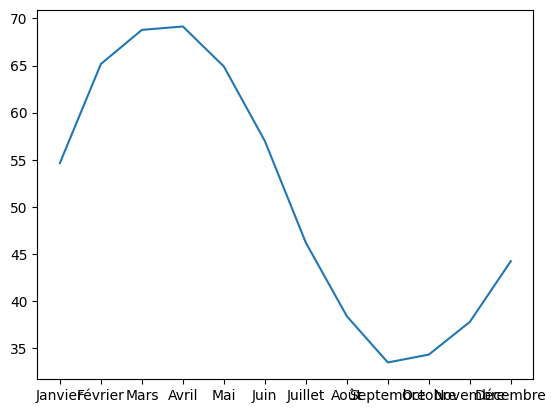

In [2]:
mean_humidity = data["Humidity"].groupby(data["Date"]).mean()

print("L'humidité moyenne par mois est de : ", mean_humidity)

plt.plot(label_month, mean_humidity)

# Oui il y a une diférence notable entre les mois en terme d'humidité

La température moyenne par mois est de :  Date
1     14.761446
2     20.636905
3     24.178641
4     24.346667
5     20.747778
6     14.424615
7      5.938542
8      0.194286
9     -4.729762
10    -4.177381
11    -0.396341
12     6.065476
Name: Temperature, dtype: float64


Text(0, 0.5, 'Temperature')

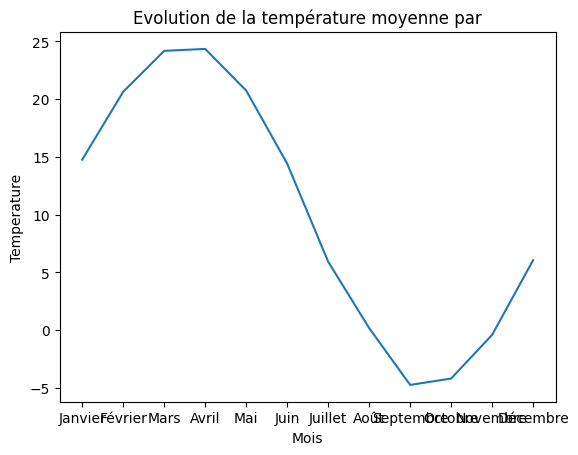

In [3]:
mean_temp_month = data["Temperature"].groupby(data["Date"]).mean()

print("La température moyenne par mois est de : ", mean_temp_month)

plt.plot(label_month, mean_temp_month)
plt.title("Evolution de la température moyenne par")
plt.xlabel("Mois")
plt.ylabel("Temperature")

# Les mois avec la température la plus élevée sont : Mars, Avril, Mai

# Les températures suivent une tendence saisonnière logique, mais pas cohérente vis à vis de la France

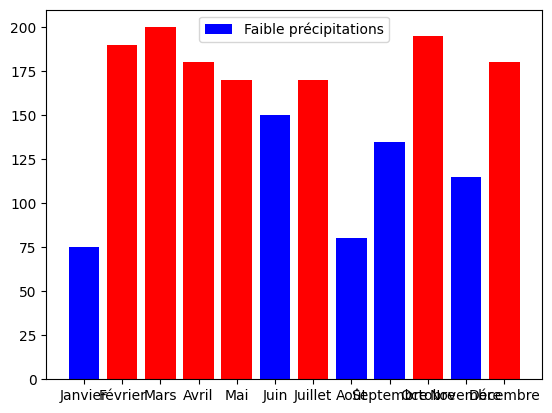

In [4]:

strong_threshold = 160

plt.bar(label_month, total_precipitation, color = ["red" if x >= strong_threshold else "blue" for x in total_precipitation])

plt.legend(["Faible précipitations", "Forte précipitations"])

# Les mois avec le plus de précipitations sont : Mars, Octobre, Février

correlation = data[["Temperature", "Precipitation", "Date"]].corr()

# Il n'y a pas de corrélation apparente entre la température et les précipitations en fonction du mois

In [27]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

strong_threshold = 160

fig = go.Figure(data=[
	go.Bar(x=label_month, y=total_precipitation, marker_color="blue", name="Précipitations par mois"),
    go.Line(x=label_month, y=mean_temp_month, marker_color="red", name="Température moyenne par mois"),
], layout_title_text="Précipitations et température moyenne par mois", layout_xaxis_title="Mois", layout_yaxis_title="Précipitations et température moyenne", layout_legend_title="Légende")


fig.show()